In [5]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Importar archivo desde el pc
uploaded = files.upload()

Saving Popular_Spotify_Songs.csv to Popular_Spotify_Songs.csv


In [6]:
# Leer el archivo en modo binario y detectar la codificación
with open('Popular_Spotify_Songs.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Mostrar la codificación detectada
print(result)

# Cargar el archivo con la codificación detectada
data = pd.read_csv('Popular_Spotify_Songs.csv', encoding=result['encoding'])

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [8]:
print(data.isnull().sum())
print(data.shape)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
(952, 24)


In [9]:
# Eliminar filas con valores nulos
data = data.dropna()
print(data.shape)

(816, 24)


In [10]:
data.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [22]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,1.568627,2018.517157,6.024510,13.712010,4852.316176,11.736520,4.689858e+08,60.215686,49.534314,372.053922,2.454657,57.622549,122.580882,67.409314,51.172794,64.356618,26.333333,1.678922,18.170343,10.535539
std,0.876522,10.701973,3.570415,9.294719,7745.565488,18.624555,5.231267e+08,74.953565,49.570536,1157.759053,5.399650,153.616316,28.188643,14.688808,23.620742,16.116646,25.477606,8.772508,13.550239,10.222852
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,5.000000,829.000000,0.000000,1.342848e+08,12.000000,6.000000,12.750000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2037.500000,3.000000,2.638368e+08,32.000000,34.500000,39.000000,0.000000,3.000000,120.000000,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4890.750000,16.000000,6.011986e+08,78.250000,84.000000,142.250000,2.000000,38.250000,141.250000,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,12367.000000,45.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [11]:
data['in_shazam_charts'] = data['in_shazam_charts'].astype('int64')

In [12]:
data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [16]:
# Preprocesamiento de datos
features = "released_month"
target = 'streams'
X = data[features].values.reshape(-1, 1)  # Reshape X to a 2D array
y = data[target]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construcción y evaluación del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3.081351718133611e+17
R^2 Score: -0.004935516170132548


In [27]:
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

intercept: 495116262.5750999
slope: [-6013267.13498227]


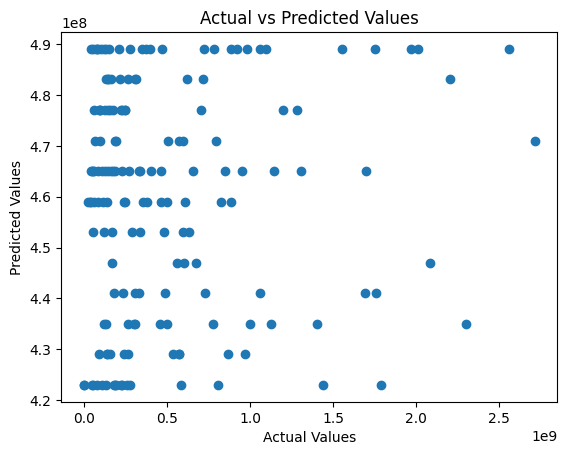

In [19]:
# Visualización de resultados
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

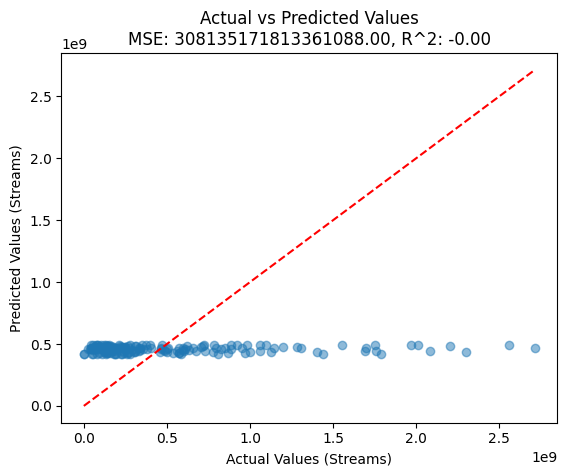

In [23]:
# Visualizar las predicciones frente a los valores reales
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values (Streams)")
plt.ylabel("Predicted Values (Streams)")
plt.title(f"Actual vs Predicted Values\nMSE: {mse:.2f}, R^2: {r2:.2f}")
plt.show()

In [25]:
# Seleccionar solo las columnas de tipo int64 o float64
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

In [26]:
# Seleccionar la correlación con 'streams' y ordenar
streams_correlation = correlation_matrix['streams'].sort_values(ascending=False)

# Mostrar la tabla de correlación
print(streams_correlation)

streams                 1.000000
in_spotify_playlists    0.780404
in_apple_playlists      0.735321
in_deezer_playlists     0.610812
in_apple_charts         0.269137
in_spotify_charts       0.214034
in_deezer_charts        0.184329
in_shazam_charts        0.015715
acousticness_%         -0.005751
released_day           -0.025116
bpm                    -0.025694
instrumentalness_%     -0.033039
energy_%               -0.036499
released_month         -0.046041
valence_%              -0.051014
liveness_%             -0.056664
danceability_%         -0.093268
speechiness_%          -0.099968
artist_count           -0.109760
released_year          -0.242726
Name: streams, dtype: float64
